In [8]:
import os
import numpy as np
import matplotlib.pyplot as plt
from helpers import *
from losses import *

In [9]:

x_train, x_test, y_train, train_ids, test_ids = load_csv_data('data_raw')


x_train.shape, y_train.shape



((328135, 321), (328135,))

## Remove low quality columns

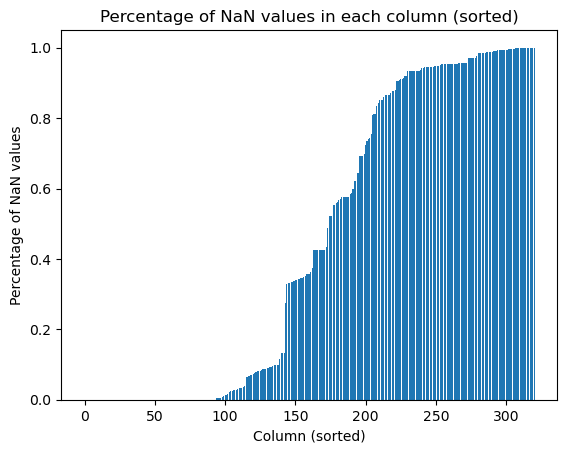

In [10]:
nan_percentage_per_column = np.isnan(x_train).sum(axis=0) / x_train.shape[0]
columns = np.arange(x_train.shape[1])  # Create an array for column indices
sorted_percentage = sorted(nan_percentage_per_column)



plt.bar(columns, sorted_percentage)

# Adding labels and title
plt.xlabel('Column (sorted)')
plt.ylabel('Percentage of NaN values')
plt.title('Percentage of NaN values in each column (sorted)')

# Show the plot
plt.show()

In [11]:
no_nan_train = nan_percentage_per_column == 0
no_nan_test = np.isnan(x_test).sum(axis=0) == 0

no_nan_columns = no_nan_train & no_nan_test

# Drop columns with NaN values
x_train = x_train[:, no_nan_columns]
x_test = x_test[:, no_nan_columns]

x_train.shape, x_test.shape

((328135, 82), (109379, 82))

## Normalization


In [12]:
means, stds = np.mean(x_train, axis=0), np.std(x_train, axis=0)

x_train = (x_train - means[None,:]) / stds[None,:]

means, stds = np.mean(x_train, axis=0), np.std(x_train, axis=0)
means,stds

(array([-9.84389741e-17,  5.97379058e-18, -6.97799371e-18, -8.38279539e-17,
        -9.75511611e-17,  5.44388266e-13, -4.98853468e-16, -2.12228099e-11,
        -2.12228099e-11,  1.04220586e-16, -1.02748115e-16, -5.48508741e-17,
         3.88282854e-17, -4.15539796e-17, -9.41406599e-17, -1.97711626e-16,
         2.51121158e-16, -1.39473258e-16,  1.34460363e-16, -8.56198204e-17,
         1.14549532e-16,  1.85455476e-16,  9.22459370e-18,  1.65111566e-17,
        -1.02033534e-16,  1.12503231e-16, -4.92249005e-16,  1.28613789e-16,
        -5.06703034e-18, -9.66850021e-18,  1.87404334e-16,  7.06677501e-17,
         1.07208834e-16, -2.28882524e-17, -1.27108838e-16,  9.94621245e-17,
        -2.36036457e-16, -1.48546274e-17,  2.37544115e-17,  1.18317324e-16,
         1.37784248e-16,  7.17179679e-17, -9.31120961e-19, -4.19762321e-17,
         1.58398833e-16, -1.86310808e-16,  4.85373868e-17,  1.22344963e-17,
         5.63003371e-19, -1.32165041e-16,  5.50010986e-18, -4.06012047e-17,
         1.2

## Remove redundant columns
Because some of the columns are linearly dependent, we have to remove them.

In [13]:
rank = np.linalg.matrix_rank(x_train)
x_train.shape
print(f"Rank of the matrix: {rank}")
print(f"Number of columns: {x_train.shape[1]}")
print(f"Expected dependent: {x_train.shape[1] - rank}")

Rank of the matrix: 77
Number of columns: 82
Expected dependent: 5


In [14]:
def find_independent_columns(X):
    print(X.shape)
    q, r = np.linalg.qr(X)
    return ~np.isclose(np.diagonal(r),np.zeros(r.shape[0]), atol=1e-5)


indep_cols = find_independent_columns(x_train)

print(f"Number of independent columns: {indep_cols.sum()}")
print(f"Number of dependent columns: {x_train.shape[1] - indep_cols.sum()}")

indep_cols.shape

(328135, 82)
Number of independent columns: 77
Number of dependent columns: 5


(82,)

In [15]:
x_train = x_train[:, indep_cols]
x_test = x_test[:, indep_cols]

x_train.shape, x_test.shape

((328135, 77), (109379, 77))

## Save the clean data

In [17]:
# Save the data
for data, name in zip([x_train, x_test, y_train, train_ids, test_ids], ['x_train', 'x_test', 'y_train', 'train_ids', 'test_ids']):
    path = os.path.join(CLEAN_DATA_PATH, name)
    np.save(os.path.join(CLEAN_DATA_PATH, name + '.npy'), data)